In [1]:
import SimpleITK as sitk
from tqdm import trange
import torch.multiprocessing as mp
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave


In [2]:
def norm_img(img):
    return (img - img.min())/(img.max() - img.min())

In [16]:
imgs = np.zeros((999,480, 752 ))

for i in trange(999):
    imgs[i] = imread('sitkRes_median_filt\\img%d.png' % i)

100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [00:14<00:00, 68.48it/s]


In [17]:
for i in trange(1,999):
    imgs[i] = norm_img(imgs[i] - imgs[0])
imgs[0] = norm_img(imgs[0]- imgs[0])

100%|███████████████████████████████████████████████████████████████████████████████| 998/998 [00:06<00:00, 164.72it/s]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [33]:
(imgs[120] - imgs[120].mean()) * med.std() / imgs[120].std()

array([[ 0.01748772,  0.01748772,  0.01748772, ...,  0.01996809,
         0.02670672,  0.0189187 ],
       [ 0.01748772,  0.01748772, -0.0686141 , ...,  0.01290857,
         0.0059618 ,  0.00447011],
       [ 0.09427513,  0.09006891,  0.01843303, ...,  0.02541449,
         0.02271731,  0.03718325],
       ...,
       [ 0.01748772, -0.11778788,  0.01202396, ...,  0.02217093,
         0.00252744, -0.00585032],
       [ 0.01748772,  0.01748772,  0.01748772, ...,  0.02109553,
         0.00032459, -0.00824396],
       [ 0.01748772,  0.01748772,  0.01748772, ...,  0.0098905 ,
        -0.00340464,  0.00349877]])

In [31]:
med = imgs[1:].mean(0)

In [34]:
for i in trange(0,999):
    imgs[i] = (imgs[i] - imgs[i].mean()) * med.std() / imgs[i].std() + med.mean()

100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [00:11<00:00, 88.21it/s]


In [35]:
imgs = (imgs - imgs[1:].min())/ (imgs[1:].max() - imgs[1:].min())

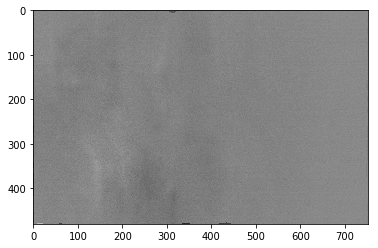

In [36]:
plt.gray()
plt.imshow(norm_img(imgs[120]))

In [3]:
o_imgs = np.zeros((999,480, 752,3 ))

for i in trange(999):
    o_imgs[i] = imread('data\\images\\frame%d.jpg' % i)

100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [00:27<00:00, 36.79it/s]


In [6]:
for i in trange(999):
    imsave('tmp_article\\img%d.jpg' % i, norm_img(o_imgs[i].mean(2)))

  0%|                                                                                          | 0/999 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [01:57<00:00,  8.47it/s]


In [7]:
o_imgs = np.zeros((999,480, 752 ))

for i in trange(999):
    o_imgs[i] = imread('tmp_article\\or\\img%d.jpg' % i)

100%|███████████████████████████████████████████████████████████████████████████████| 999/999 [00:06<00:00, 152.72it/s]


In [8]:
for i in trange(1,999):
    o_imgs[i] = norm_img(o_imgs[i] - o_imgs[0])

o_imgs[0] = norm_img(o_imgs[0] - o_imgs[0])
med = o_imgs[1:].mean(0)

for i in trange(0,999):
    o_imgs[i] = (o_imgs[i] - o_imgs[i].mean()) * med.std() / o_imgs[i].std() + med.mean()
    
o_imgs = (o_imgs - o_imgs[1:].min())/ (o_imgs[1:].max() - o_imgs[1:].min())

100%|███████████████████████████████████████████████████████████████████████████████| 998/998 [00:08<00:00, 120.14it/s]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [00:15<00:00, 66.41it/s]


In [9]:
for i in trange(999):
    imsave('tmp_article\\diff_or\\img%d.jpg' % i, (o_imgs[i]))

  0%|                                                                                          | 0/999 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [00:37<00:00, 26.49it/s]


In [37]:
for i in trange(999):
    imsave('tmp_article\\diff_reg\\img%d.jpg' % i, (imgs[i]))

  0%|                                                                                          | 0/999 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
  0%|                                                                                  | 1/999 [00:00<04:37,  3.59it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
  0%|▏                                                                                 | 2/999 [00:00<03:13,  5.16it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img2.jpg is a low contrast image
  warn('%s is a low contrast image

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img38.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img39.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
  4%|███▏                                                                             | 40/999 [00:02<00:48, 19.62it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img40.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img41.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img42.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
  4%|███▍                                     

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img78.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img79.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
  8%|██████▍                                                                          | 80/999 [00:03<00:43, 20.98it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img80.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img81.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img82.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
  8%|██████▋                                  

 12%|█████████▌                                                                      | 120/999 [00:05<00:39, 22.21it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img120.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img121.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img122.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img123.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 12%|█████████▉                                                                      | 124/999 [00:05<00:38, 22.45it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img161.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img162.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 16%|█████████████                                                                   | 163/999 [00:06<00:35, 23.59it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img163.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img164.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img165.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 17%|█████████████▎                      

 20%|████████████████                                                                | 201/999 [00:08<00:32, 24.26it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img201.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img202.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img203.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img204.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 21%|████████████████▍                                                               | 205/999 [00:08<00:32, 24.37it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img241.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 24%|███████████████████▍                                                            | 242/999 [00:09<00:30, 24.79it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img242.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img243.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img244.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img245.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 25%|███████████████████▋                

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img282.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img283.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 28%|██████████████████████▋                                                         | 284/999 [00:11<00:28, 25.42it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img284.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img285.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img286.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img322.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img323.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 32%|█████████████████████████▉                                                      | 324/999 [00:12<00:26, 25.25it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img324.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img325.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img326.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 33%|██████████████████████████▏         

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img362.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img363.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 36%|█████████████████████████████▏                                                  | 364/999 [00:14<00:25, 25.23it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img364.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img365.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img366.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 37%|█████████████████████████████▍      

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img402.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 40%|████████████████████████████████▎                                               | 403/999 [00:16<00:23, 24.93it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img403.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img404.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img405.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 41%|████████████████████████████████▌                                               | 406/999 [00:16<00:23, 24.92it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

 44%|███████████████████████████████████▍                                            | 442/999 [00:18<00:23, 24.19it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img442.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img443.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 44%|███████████████████████████████████▌                                            | 444/999 [00:18<00:22, 24.13it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img444.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img445.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img481.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img482.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 48%|██████████████████████████████████████▋                                         | 483/999 [00:20<00:21, 24.09it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img483.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img484.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img485.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 49%|████████████████████████████████████

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img521.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 52%|█████████████████████████████████████████▊                                      | 522/999 [00:21<00:20, 23.82it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img522.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img523.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img524.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 53%|██████████████████████████████████████████                                      | 525/999 [00:22<00:19, 23.81it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

 56%|████████████████████████████████████████████▉                                   | 561/999 [00:23<00:18, 23.48it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img561.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img562.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 56%|█████████████████████████████████████████████                                   | 563/999 [00:24<00:18, 23.36it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img563.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img564.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img601.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 60%|████████████████████████████████████████████████▏                               | 602/999 [00:26<00:17, 22.92it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img602.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img603.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img604.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 61%|████████████████████████████████████████████████▍                               | 605/999 [00:26<00:17, 22.93it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

 64%|███████████████████████████████████████████████████▎                            | 640/999 [00:28<00:15, 22.60it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img640.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img641.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 64%|███████████████████████████████████████████████████▍                            | 642/999 [00:28<00:15, 22.48it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img642.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img643.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 64%|███████████████████████████████████████████████████▌                            | 644

 68%|██████████████████████████████████████████████████████▎                         | 679/999 [00:30<00:14, 22.10it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img679.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img680.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img681.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 68%|██████████████████████████████████████████████████████▌                         | 682/999 [00:30<00:14, 22.12it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img682.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img718.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img719.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 72%|█████████████████████████████████████████████████████████▋                      | 720/999 [00:33<00:12, 21.81it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img720.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img721.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img722.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 72%|████████████████████████████████████

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img758.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img759.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 76%|████████████████████████████████████████████████████████████▊                   | 760/999 [00:35<00:11, 21.57it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img760.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img761.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img762.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 76%|████████████████████████████████████

 80%|███████████████████████████████████████████████████████████████▉                | 798/999 [00:37<00:09, 21.19it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img798.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img799.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img800.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 80%|████████████████████████████████████████████████████████████████▏               | 801/999 [00:38<00:09, 20.93it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img801.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 81%|████████████████████████████████████████████████████████████████▋               | 808

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img843.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img844.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 85%|███████████████████████████████████████████████████████████████████▋            | 845/999 [00:41<00:07, 20.56it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img845.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img846.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 85%|███████████████████████████████████████████████████████████████████▊            | 847/999 [00:41<00:07, 20.19it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\im

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img883.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 88%|██████████████████████████████████████████████████████████████████████▊         | 884/999 [00:44<00:05, 20.01it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img884.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img885.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img886.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img887.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 89%|████████████████████████████████████

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img924.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img925.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 93%|██████████████████████████████████████████████████████████████████████████▏     | 926/999 [00:46<00:03, 19.89it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img926.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img927.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img928.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 93%|████████████████████████████████████

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img964.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 97%|█████████████████████████████████████████████████████████████████████████████▎  | 965/999 [00:48<00:01, 19.86it/s]C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img965.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img966.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img967.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: tmp_article\diff_reg\img968.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 97%|████████████████████████████████████

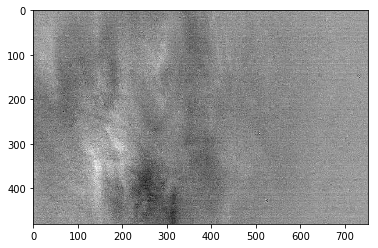

In [19]:
plt.imshow(norm_img(o_imgs[120]))

In [4]:
imread('correct_preproc\\blur\\correct_preproc%04d.png' % 0).shape

(480, 752)

In [6]:
imgs = np.zeros((999,480, 752 ))

for i in trange(999):
    imgs[i] = imread('correct_preproc\\blur\\correct_preproc%04d.png' % i)

100%|███████████████████████████████████████████████████████████████████████████████| 999/999 [00:09<00:00, 107.90it/s]


In [9]:
median = np.median(imgs, axis=0)
median.shape

(480, 752)

In [30]:
for i in trange(999):
    imgs[i] = np.minimum(median, imgs[i])

100%|███████████████████████████████████████████████████████████████████████████████| 999/999 [00:05<00:00, 191.82it/s]


In [31]:
for i in trange(999):
    imsave('filtred_median\\img%d.png'%i, np.uint8(imgs[i]))

100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [01:16<00:00, 13.06it/s]


In [26]:
imsave('median.png',np.uint8(median ))

In [5]:
for i in trange(388,1000):
    img = imread("data\\images\\frame%d.jpg"%i)
    img = img.mean(2)
    imsave('tmp\\img%d.png' % i, img / img.max())


  0%|                                                                                          | 0/612 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))

100%|███████████████████████████████████████████████████████████████████████████████▊| 611/612 [03:04<00:00,  3.31it/s]

OSError: cannot identify image file <_io.BufferedReader name='data\\images\\frame999.jpg'>

In [ ]:
population = [('data\\aligned_illumination\img%d.png' % i) for i in range(1,150) ]
vectorOfImages = sitk.VectorOfImage()

for filename in population:
    vectorOfImages.push_back(sitk.ReadImage(filename))

image = sitk.JoinSeries(vectorOfImages)

# Register
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(image)
elastixImageFilter.SetMovingImage(image)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap('groupwise'))
elastixImageFilter.Execute()

In [7]:
m = sitk.GetDefaultParameterMap("affine")
m['MaximumNumberOfIterations']

('256',)

In [3]:
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(sitk.ReadImage('data\\aligned_illumination\img0.png'))
elastixImageFilter.SetMovingImage(sitk.ReadImage('data\\aligned_illumination\img100.png'))

parameterMapVector = sitk.VectorOfParameterMap()
parameterMapVector.append(sitk.GetDefaultParameterMap("affine"))
parameterMapVector.append(sitk.GetDefaultParameterMap("bspline"))
elastixImageFilter.SetParameterMap(parameterMapVector)

elastixImageFilter.Execute()
# sitk.WriteImage(elastixImageFilter.GetResultImage())

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001C89E05EC00> >

In [47]:
bspline['DefaultPixelValue']

('0.0',)

In [46]:
sitk.WriteTransform(bspline, 'bspline.tfm')

TypeError: in method 'WriteTransform', argument 1 of type 'itk::simple::Transform const &'

In [27]:
t_map = elastixImageFilter.GetTransformParameterMap()
affine = t_map[0]
bspline = t_map[1]
bspline.keys()

['BSplineTransformSplineOrder',
 'CompressResultImage',
 'DefaultPixelValue',
 'Direction',
 'FinalBSplineInterpolationOrder',
 'FixedImageDimension',
 'FixedInternalImagePixelType',
 'GridDirection',
 'GridIndex',
 'GridOrigin',
 'GridSize',
 'GridSpacing',
 'HowToCombineTransforms',
 'Index',
 'InitialTransformParametersFileName',
 'MovingImageDimension',
 'MovingInternalImagePixelType',
 'NumberOfParameters',
 'Origin',
 'ResampleInterpolator',
 'Resampler',
 'ResultImageFormat',
 'ResultImagePixelType',
 'Size',
 'Spacing',
 'Transform',
 'TransformParameters',
 'UseCyclicTransform',
 'UseDirectionCosines']

In [4]:
transformParameterMap = elastixImageFilter.GetTransformParameterMap()
transformixImageFilter = sitk.TransformixImageFilter()
transformixImageFilter.SetTransformParameterMap(transformParameterMap)
transformixImageFilter.SetMovingImage(sitk.ReadImage('tmp\\img100.png'))
transformixImageFilter.Execute()

res = transformixImageFilter.GetResultImage()
img_reg = np.zeros((res.GetHeight(),res.GetWidth()))
for i in range(img_reg.shape[0]):
    for j in range(img_reg.shape[1]):
        img_reg[i,j] = res.GetPixel(j,i)
imsave('orig_img100.png' , img_reg / img_reg.max())

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [20]:
# elastixImageFilter_transl = sitk.ElastixImageFilter()
# elastixImageFilter.SetFixedImage()
# elastixImageFilter.SetMovingImage()

# parameterMapVector = sitk.VectorOfParameterMap()
# parameterMapVector.append(sitk.GetDefaultParameterMap("affine"))
# parameterMapVector.append(sitk.GetDefaultParameterMap("bspline"))
# elastixImageFilter.SetParameterMap(parameterMapVector)

# elastixImageFilter.Execute()

resultImage = sitk.Elastix(sitk.ReadImage('data\\aligned_illumination\img0.png'),  \
                           sitk.ReadImage('data\\aligned_illumination\img100.png'), \
                           'translation')

In [40]:
parameterMap = sitk.GetDefaultParameterMap('translation')

# Use a non-rigid transform instead of a translation transform
parameterMap['Transform'] = ['BSplineTransform']

# Because of the increased complexity of the b-spline transform,
# it is a good idea to run the registration a little longer to
# ensure convergence
parameterMap['MaximumNumberOfIterations'] = ['512']
resultImage = sitk.Elastix(sitk.ReadImage('data\\aligned_illumination\img0.png'),  \
                           sitk.ReadImage('data\\aligned_illumination\img100.png'), \
                           parameterMap)

In [36]:
sitk.PrintParameterMap(parameterMap)

In [37]:
img_reg = np.zeros((resultImage.GetHeight(),resultImage.GetWidth()))
for i in range(img_reg.shape[0]):
    for j in range(img_reg.shape[1]):
        img_reg[i,j] = resultImage.GetPixel(j,i)
imsave('img_trans.png' , img_reg / img_reg.max())

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [30]:
elastixImageFilter.PrintParameterMap()


<SimpleITK.SimpleITK.ElastixImageFilter; proxy of <Swig Object of type 'itk::simple::ElastixImageFilter::Self *' at 0x00000230D2376C30> >

In [29]:
sitk.PrintParameterMap(transformParameterMap)

In [15]:
reg = elastixImageFilter.GetResultImage()

In [ ]:

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(sitk.ReadImage('data\\aligned_illumination\img0.png'))
for k in trange(1,500):
    elastixImageFilter.SetMovingImage(sitk.ReadImage('data\\aligned_illumination\img%d.png' % k))

    parameterMapVector = sitk.VectorOfParameterMap()
    parameterMapVector.append(sitk.GetDefaultParameterMap("affine"))
    parameterMapVector.append(sitk.GetDefaultParameterMap("bspline"))
    elastixImageFilter.SetParameterMap(parameterMapVector)

    elastixImageFilter.Execute()
    #sitk.WriteImage(elastixImageFilter.GetResultImage(),'sitkRes\\img%d.png' % k)
    img_reg = np.zeros((res.GetHeight(),res.GetWidth()))
    for i in range(img_reg.shape[0]):
        for j in range(img_reg.shape[1]):
            img_reg[i,j] = res.GetPixel(j,i)
    imsave('sitkRes\\img%d.png' % k, img_reg / img_reg.max())

In [7]:
#import multiprocessing as mp
mp.set_start_method('spawn',  force=True)

def child_proc(num, i):
    print('Init train child:%d, Proccess PID:%d' % (num, os.getpid()))
#     elastixImageFilter = sitk.ElastixImageFilter()
#     elastixImageFilter.SetFixedImage(sitk.ReadImage('data\\aligned_illumination\img0.png'))
#     elastixImageFilter.SetMovingImage(sitk.ReadImage('data\\aligned_illumination\img%d.png' % num))

#     parameterMapVector = sitk.VectorOfParameterMap()
#     parameterMapVector.append(sitk.GetDefaultParameterMap("affine"))
#     parameterMapVector.append(sitk.GetDefaultParameterMap("bspline"))
#     elastixImageFilter.SetParameterMap(parameterMapVector)

#     elastixImageFilter.Execute()
#    res = elastixImageFilter.GetResultImage()
#     img_reg = np.zeros((res.GetHeight(),res.GetWidth()))
#     for i in range(img_reg.shape[0]):
#         for j in range(img_reg.shape[1]):
#             img_reg[i,j] = res.GetPixel(j,i)
#     imsave('sitkRes\\img%d.png' % num, img_reg / img_reg.max())

processes = []
for i in range(8, 10):
    proc = mp.Process(target=child_proc, args=(i,i))
    proc.start()
    processes.append(proc)

print('\nCHILD Proccess started\n')
for p in processes:
    p.join()


CHILD Proccess started



In [ ]:
population = ['image1.hdr', ..., 'imageN.hdr']
vectorOfImages = sitk.VectorOfImage()

for filename in population
  vectorOfImages.push_back(sitk.ReadImage(filename))

image = sitk.JoinSeries(vectorOfImages)

# Register
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(image)
elastixImageFilter.SetMovingImage(image)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap('groupwise'))
elastixImageFilter.Execute()

In [5]:
processes[0]

20704

In [5]:
sitk

<module 'SimpleITK' from 'C:\\Anaconda3\\lib\\site-packages\\simpleitk-1.1.0.dev348+g21cf7-py3.6-win-amd64.egg\\SimpleITK\\__init__.py'>

In [47]:
sitk.WriteImage(elastixImageFilter.GetResultImage(),'sitkRes\\img%d.tiff' % k)

In [5]:
res =elastixImageFilter.GetResultImage()
img_reg = np.zeros((res.GetHeight(),res.GetWidth()))
for i in range(img_reg.shape[0]):
    for j in range(img_reg.shape[1]):
        img_reg[i,j] = res.GetPixel(j,i)
imsave('img%d_reg.png' % 0, img_reg / img_reg.max())

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [16]:
transformParameterMap = elastixImageFilter.GetTransformParameterMap()
transformixImageFilter = sitk.TransformixImageFilter()
transformixImageFilter.SetTransformParameterMap(transformParameterMap)
transformixImageFilter.SetMovingImage(sitk.ReadImage('data\\aligned_illumination\img100.png'))
transformixImageFilter.Execute()

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x00000175675A2030> >

In [17]:
res = transformixImageFilter.GetResultImage()
img_reg = np.zeros((res.GetHeight(),res.GetWidth()))
for i in range(img_reg.shape[0]):
    for j in range(img_reg.shape[1]):
        img_reg[i,j] = res.GetPixel(j,i)
imsave('img%d_res.png' % 0, img_reg / img_reg.max())

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


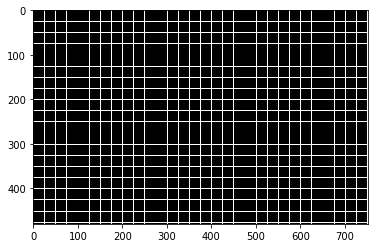

In [29]:
grid = np.zeros((res.GetHeight(),res.GetWidth()))
grid[:,25:27] = 1
for i in range(50):
    grid[:,25*(i+1):25*(i+1)+2] = 1
for i in range(20):
    grid[25*(i+1):25*(i+1)+2,:] = 1
plt.gray()
plt.imshow(grid)
imsave('grid.png',grid)

In [27]:
transformParameterMap = elastixImageFilter.GetTransformParameterMap()
transformixImageFilter = sitk.TransformixImageFilter()
transformixImageFilter.SetTransformParameterMap(transformParameterMap)
transformixImageFilter.SetMovingImage(sitk.ReadImage('grid.png'))
transformixImageFilter.Execute()

res = transformixImageFilter.GetResultImage()
img_reg = np.zeros((res.GetHeight(),res.GetWidth()))
for i in range(img_reg.shape[0]):
    for j in range(img_reg.shape[1]):
        img_reg[i,j] = res.GetPixel(j,i)
imsave('grid_warp.png' , img_reg / img_reg.max())

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [41]:
transformParameterMap = parameterMap
transformixImageFilter = sitk.TransformixImageFilter()
transformixImageFilter.SetTransformParameterMap(transformParameterMap)
transformixImageFilter.SetMovingImage(sitk.ReadImage('grid.png'))
transformixImageFilter.Execute()

res = transformixImageFilter.GetResultImage()
img_reg = np.zeros((res.GetHeight(),res.GetWidth()))
for i in range(img_reg.shape[0]):
    for j in range(img_reg.shape[1]):
        img_reg[i,j] = res.GetPixel(j,i)
imsave('grid_warp2.png' , img_reg / img_reg.max())

RuntimeError: 

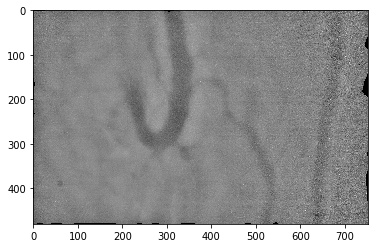

In [49]:


img_reg = np.zeros((res.GetHeight(),res.GetWidth()))
for i in range(img_reg.shape[0]):
    for j in range(img_reg.shape[1]):
        img_reg[i,j] = res.GetPixel(j,i)
plt.imshow(img_reg)

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


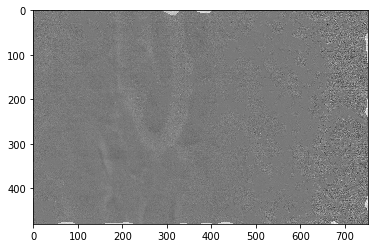

In [37]:
plt.gray()
img0 = imread('data\\aligned_illumination\img100.png') 
plt.imshow(img0 - im / img0.max()  - img_reg/ img_reg.max())
imsave('img100.png', img_reg / img_reg.max())

In [17]:
reader = sitk.ImageFileReader()
reader.SetFileName('data\\aligned_illumination\img0.png' )
img0 = reader.Execute()

In [18]:
reader = sitk.ImageFileReader()
reader.SetFileName('data\\aligned_illumination\img1.png' )
img2 = reader.Execute()

In [11]:
img0 = sitk.ReadImage('data\\aligned_illumination\img0.png')
img1 = sitk.ReadImage('data\\aligned_illumination\img1.png')

In [19]:
reg = sitk.ImageRegistrationMethod()
reg.Set
reg.Execute(fixed=img0, moving=img1)

RuntimeError: Exception thrown in SimpleITK ImageRegistrationMethod_Execute: C:\d\VS14-Win64-pkg\SimpleITK\Code\Registration\src\sitkImageRegistrationMethod.cxx:745:
sitk::ERROR: Filter does not support fixed image type: 8-bit unsigned integer

In [12]:
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(first_frame)# sitk.ReadImage("fixedImage.nii"))
elastixImageFilter.SetMovingImage(second_frame)#sitk.ReadImage("movingImage.nii"))

parameterMapVector = sitk.VectorOfParameterMap()
parameterMapVector.append(sitk.GetDefaultParameterMap("affine"))
parameterMapVector.append(sitk.GetDefaultParameterMap("bspline"))
elastixImageFilter.SetParameterMap(parameterMapVector)

elastixImageFilter.Execute()
sitk.WriteImage(elastixImageFilter.GetResultImage())

AttributeError: module 'SimpleITK' has no attribute 'ElastixImageFilter'

In [26]:
reg = sitk.ImageRegistrationMethod()

reg.Execute(fixed=img0, moving=img1)

RuntimeError: Exception thrown in SimpleITK ImageRegistrationMethod_Execute: C:\d\VS14-Win64-pkg\SimpleITK\Code\Registration\src\sitkImageRegistrationMethod.cxx:745:
sitk::ERROR: Filter does not support fixed image type: 8-bit unsigned integer

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from tqdm import trange
plt.gray()

In [51]:
filename = '.\msCam1.avi'
vidcap = cv2.VideoCapture(filename)

In [52]:
filename = '.\msCam1.avi'
vidcap = cv2.VideoCapture(filename)

def MultiscaleRetinex(image, n = 3, sigma = 1.6):
    result = np.zeros(image.shape)
    for i in range(n):
        curS = (int)(sigma*(i+1)*6);
        s = 3 if curS < 1 else curS if curS % 2 == 1 else curS + 1;
        temp = cv2.GaussianBlur(image,(s, s), sigma, sigma) + 0.1
        result = result + np.log(image / temp ) 
    return result / n 

def gamma_correction(img, correction):
    img = (img.astype('float32') - img.min()) / (img.max() - img.min())
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

success, first_frame = vidcap.read() 
mean_intensity = gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65).mean()
var_intensity = gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65).std()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('.\\output_aligned_lim.avi', fourcc, 20.0, (752,480))

filename = '.\msCam1.avi'
vidcap = cv2.VideoCapture(filename)
for i in trange(0,1000):
#     im = imread('.\\aligned1n\\frame%d.jpg' % i, plugin='matplotlib')
    success, im = vidcap.read() 
    im = gamma_correction(MultiscaleRetinex(cv2.cvtColor(im ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65)
    cur_mean_intensity = im.mean()
    cur_var_intensity = im.std()
    im = np.uint8( (im -  cur_mean_intensity)*var_intensity/cur_var_intensity + mean_intensity )
    #im = (im - mean) / var
    #im = (im - im.min())/(im.max() - im.min())
    imsave('.\\data\\aligned_illumination\\img%d.png' % i, im )
    #out.write(im)
out.release()
cv2.destroyAllWindows()

In [53]:
def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
 
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

def gamma_correction(img, correction):
    img = (img.astype('float32') - img.min()) / (img.max() - img.min())
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

def unsharp(image,sigma = 15,n = 5 ):
    base_img = image
    for i in range(n):
        kernel_size = int(sigma*(i+1)*4/3.0)
        if kernel_size % 2==0:
            kernel_size += 1
        image = cv2.addWeighted(image, 1, cv2.GaussianBlur(base_img,(kernel_size, kernel_size), sigma*(i+1), sigma*(i+1)) ,-1.0 / (n+1), 0) 
    
    return image

def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

def preprocessing(image):
    preprocessedImage = None
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #image = gamma_correction(image, 0.6)
    #image = image / cv2.GaussianBlur(image ,(201, 201), 90, 90)
    #image =  (np.round( image * 255) + 200) % 256
    #image,_ = image_histogram_equalization(image)
    image =  np.uint8(image* 255.0 / image.max())
    #image = cv2.equalizeHist(image) 
    image = gamma_correction(image, 0.7)
    image = cv2.addWeighted(image, 2, cv2.GaussianBlur(image,(91, 91), 59, 59) , -1, 0) # unsharp

    #image = gamma_correction(1 - image,0.6)
    preprocessedImage = np.uint8(image* 255.0/ image.max())
    return preprocessedImage

In [3]:
success, first_frame = vidcap.read() 

In [5]:
_, second_frame = vidcap.read() 

In [85]:
cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY).mean(), MultiscaleRetinex(cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY)+20 ,20,).mean()
MultiscaleRetinex(cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY) +10 ,3, 50).mean()

0.1751203444593471

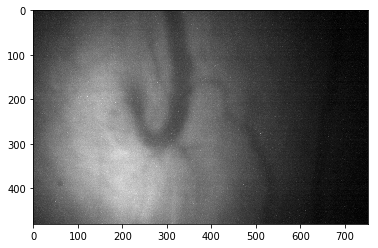

In [8]:
plt.imshow(first_frame.mean(2))

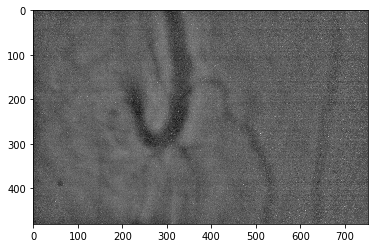

In [103]:
plt.imshow(gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +55 ,3, 25),0.65))

In [67]:
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from tqdm import trange

filename = '.\msCam1.avi'
vidcap = cv2.VideoCapture(filename)
mean = 0

for i in trange(0,150):
    success, im = vidcap.read() 
    im = gamma_correction(MultiscaleRetinex(cv2.cvtColor(im ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65)
    mean += im
mean = mean / 150.

var = 0
filename = '.\msCam1.avi'
vidcap = cv2.VideoCapture(filename)
for i in trange(0,150):
    success, im = vidcap.read() 
    im = gamma_correction(MultiscaleRetinex(cv2.cvtColor(im ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65)
    var += (im - mean)**2
    
var =var / 150

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:42<00:00,  3.53it/s]


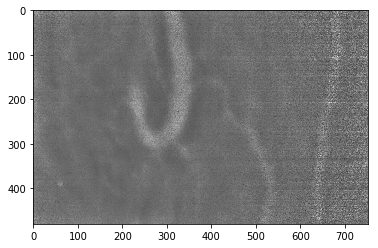

In [77]:
plt.imshow((im - mean)*255/ var)

In [81]:
((im - mean)/ var).max()

0.02217011179402108

In [42]:
first_frame.shape

(480, 752, 3)

In [65]:
def kaze_match(im1, im2):
    # load the image and convert it to grayscale
    #im1 = cv2.imread(im1_path)
    #im2 = cv2.imread(im2_path)
    gray1 = im1#cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    gray2 = im2#cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)    

    # initialize the AKAZE descriptor, then detect keypoints and extract
    # local invariant descriptors from the image
    detector = cv2.AKAZE_create()
    (kps1, descs1) = detector.detectAndCompute(gray1, None)
    (kps2, descs2) = detector.detectAndCompute(gray2, None)

    print(kps1)
    print("keypoints: {}, descriptors: {}".format(len(kps1), descs1.shape))
    print("keypoints: {}, descriptors: {}".format(len(kps2), descs2.shape))    

    # Match the features
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(descs1,descs2, k=2)    # typo fixed

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good.append([m])

    # cv2.drawMatchesKnn expects list of lists as matches.
    im3 = cv2.drawMatchesKnn(im1, kps1, im2, kps2, good[1:20], None, flags=2)
    cv2.imshow("AKAZE matching", im3)
    cv2.waitKey(0) 
    
kaze_match(first_frame, gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65))

[]


AttributeError: 'NoneType' object has no attribute 'shape'

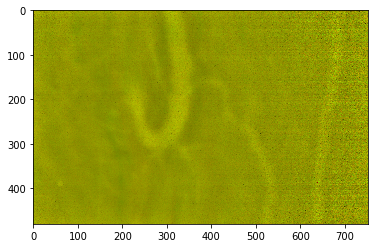

In [58]:
temp = np.zeros(first_frame.shape)
temp[...,0] = im
temp[...,1] = gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65)
plt.imshow(temp)

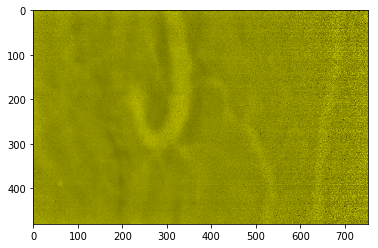

In [59]:
temp = np.zeros(first_frame.shape)
temp[...,0] = im
temp[...,1] = im#gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65)
plt.imshow(temp)

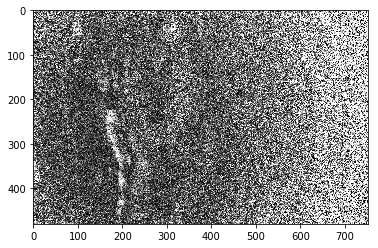

In [45]:
f1 = gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +10 ,3, 25),0.65)
f2 = im
f1 =(f1 - f1.min()) /(f1.max() - f1.min())
f2 =(f2 - f2.min()) /(f2.max() - f2.min())
f3 =(f3 - f3.min()) /(f3.max() - f3.min())
plt.imshow(abs(f2 -f1), vmin=0, vmax=0.05)

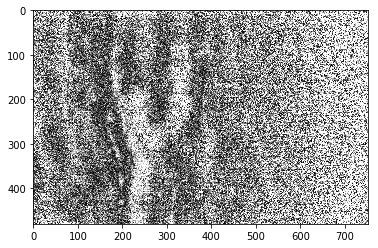

In [48]:
registred = imread('Registered Source Image.png')
registred =(registred - registred.min()) /(registred.max() - registred.min())
plt.imshow(abs(f3 - f1), vmin=0,vmax = 0.05)

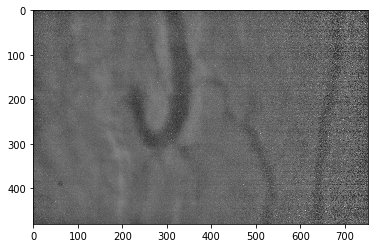

In [34]:
cur_mean_intensity = registred.mean()
cur_var_intensity = registred.std()
f3 = np.uint8( (registred -  cur_mean_intensity)*var_intensity/cur_var_intensity + mean_intensity )
()

In [36]:
((f2 - f1)**2).mean(), ((registred - f1)**2).mean(), ((registred - f2)**2).mean(), f2.mean()

(0.0013722672580703222,
 0.0020769568987378012,
 0.0006367737665406726,
 0.41648762062694467)

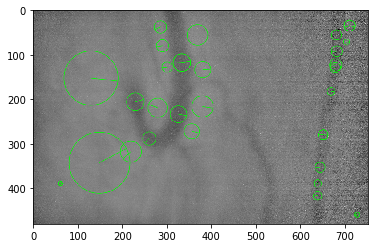

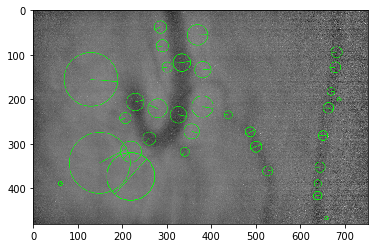

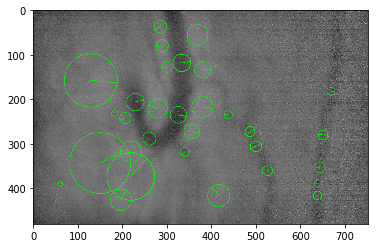

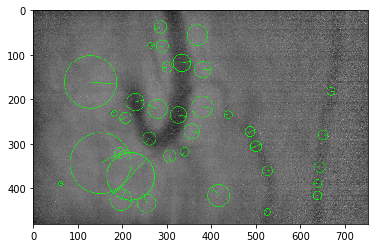

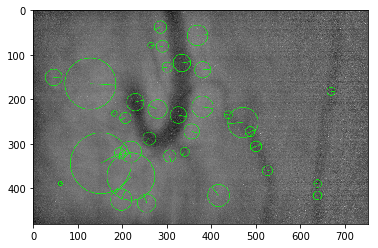

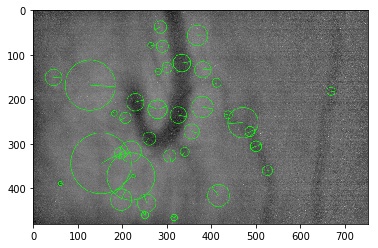

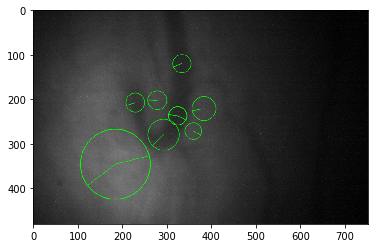

In [106]:
image_with_kp = gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +10 ,3, 50),0.5)
# sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15,contrastThreshold = 0.02,edgeThreshold = 35, sigma = 7.5)
# kp = sift.detect(image_with_kp,None)


# image_with_kp = cv2.drawKeypoints(image_with_kp, kp, image_with_kp, color = (0,255,0)
#                                   ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# #image_with_kp =cv2.drawKeypoints(gray,kp)

# plt.imshow(image_with_kp)


def find_keypoints(im):
    image_with_kp = im
    sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15,contrastThreshold = 0.02,edgeThreshold = 35, sigma = 7.5)
    kp = sift.detect(image_with_kp,None)


    image_with_kp = cv2.drawKeypoints(image_with_kp, kp, image_with_kp, color = (0,255,0)
                                      ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #image_with_kp =cv2.drawKeypoints(gray,kp)

    plt.imshow(image_with_kp)
    plt.show()
find_keypoints(gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +5 ,3, 50),0.65))
find_keypoints(gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +10 ,3, 50),0.65))
find_keypoints(gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +15 ,3, 50),0.65))
find_keypoints(gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +20 ,3, 50),0.65))
find_keypoints(gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +25 ,3, 50),0.65))
find_keypoints(gamma_correction(MultiscaleRetinex(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) +30 ,3, 50),0.65))
find_keypoints(cv2.cvtColor(first_frame ,cv2.COLOR_BGR2GRAY) )

In [107]:
from IPython.display import clear_output
from tqdm import trange
from skimage.io import imread
from os.path import join


def common_points():
    sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15,contrastThreshold = 0.015,edgeThreshold = 35, sigma = 2.5)
    filename = '.\msCam1.avi'
    vidcap = cv2.VideoCapture(filename)
    success,image = vidcap.read()
    image = cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY)#gamma_correction(MultiscaleRetinex(cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY) +10 ,3, 50),0.5)
    kp, des = sift.detectAndCompute(image,None)
    common_points = [n for n in range(len(kp))]
    
    counter = 0
    while success:
        success,image = vidcap.read()
        image = cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY)#gamma_correction(MultiscaleRetinex(cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY) +10 ,3, 50),0.5)
        kp_cur, des_cur = sift.detectAndCompute(image,None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des,des_cur, k=2)
        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])
        points_cur = [good[i][0].queryIdx for i in range(len(good))]
        common_points = np.intersect1d(common_points, points_cur)
        if len(common_points)==0:
            break
        counter = counter +1
        print(len(common_points), counter)
        if counter > 100:
            break;
    return common_points

In [120]:
common_points()

41 1
28 2
21 3
18 4
14 5
14 6
13 7
11 8
11 9
11 10
11 11
10 12
10 13
10 14
10 15
8 16
7 17
6 18
6 19
6 20
6 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
3 40
3 41
3 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
1 62
1 63
1 64
1 65


array([], dtype=int32)

In [108]:
common_points()

12 1
11 2
10 3
7 4
7 5
7 6
7 7
7 8
6 9
5 10
5 11
5 12
5 13
5 14
5 15
4 16
3 17
3 18
3 19
3 20
3 21
3 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55


array([], dtype=int32)

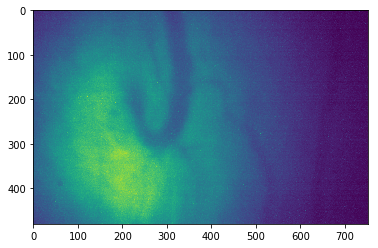

In [15]:
plt.imshow(cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY))

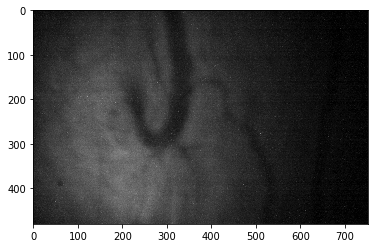

In [16]:
plt.imshow(unsharp(img1))
plt.imshow(cv2.addWeighted(img1, 2, cv2.GaussianBlur(img1,(71, 71), 59, 59) , -1, 0)) # unsharp


In [97]:
from IPython.display import clear_output
from tqdm import trange
from skimage.io import imread
from os.path import join


def common_points(bandwigth = 10, nimages = 1000, path = './images'):
    sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15, contrastThreshold = 0.009, edgeThreshold = 15, sigma = 2.3);
    points_to_frame = []
    for i in trange(bandwigth, nimages- bandwigth + 1):
        slid_frame = imread(join(path, 'frame' + str(i)+'.jpg'))
        slid_frame = preprocessing(slid_frame)
        
        kp, des = sift.detectAndCompute(slid_frame,None)
        common_points = [n for n in range(len(kp))]
        for j in range(i-bandwigth,i+bandwigth):
            if i==j:
                continue;
            current_frame = imread(join(path , 'frame' + str(i)+'.jpg'))
            current_frame = preprocessing(current_frame)
            kp_cur, des_cur = sift.detectAndCompute(current_frame,None)
            bf = cv2.BFMatcher()
            matches = bf.knnMatch(des,des_cur, k=2)
            good = []
            for m,n in matches:
                if m.distance < 0.75*n.distance:
                    good.append([m])
            points_cur = [good[i][0].queryIdx for i in range(len(good))]
            
            common_points = np.intersect1d(common_points, points_cur)
            if len(common_points)==0:
                break
        points_to_frame.append(common_points)
    return points_to_frame

In [98]:
common_points(500)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
# from skimage.io import imread
import scipy.misc
scipy.misc.imread#('./images/frame0.jpg')

<function numpy.lib.utils._Deprecate.__call__.<locals>.newfunc>

In [118]:
from IPython.display import clear_output
from tqdm import trange


sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15, contrastThreshold = 0.0009,edgeThreshold =35, sigma = 7.5);
success, first_frame = vidcap.read() 
first_frame = preprocessing(first_frame)

kp, des = sift.detectAndCompute(first_frame,None)
common_points = [n for n in range(len(kp))]
print(common_points)

count = 0; 
#while success:
for i in trange(1000):
    success,image = vidcap.read()
    image = preprocessing(image)
    
    kp_cur, des_cur = sift.detectAndCompute(image,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des,des_cur, k=2)
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    points_cur = [good[i][0].queryIdx for i in range(len(good))]
    #print(common_points)
    common_points = np.intersect1d(common_points, points_cur)
    count += 1
    #clear_output()
    #print(count)
    if count == 15:
        break

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

  1%|█                                                                               | 14/1000 [00:06<07:12,  2.28it/s]


In [119]:
print(common_points.shape, common_points)

(24,) [  6  15  35  40  46  50  82  97 107 134 138 163 178 182 189 201 224 231
 235 244 256 298 310 317]


In [120]:
kp_res = [kp[q] for q in common_points]

In [256]:
kp_res

[<KeyPoint 000002168127DED0>,
 <KeyPoint 000002168127D3F0>,
 <KeyPoint 00000216801A5240>,
 <KeyPoint 00000216801A52D0>,
 <KeyPoint 00000216801A57B0>,
 <KeyPoint 00000216801A5B70>,
 <KeyPoint 00000216826A31B0>,
 <KeyPoint 00000216826A3660>,
 <KeyPoint 00000216826A3420>,
 <KeyPoint 00000216826A3840>,
 <KeyPoint 00000216826A3AE0>,
 <KeyPoint 00000216826A3540>,
 <KeyPoint 00000216826A3780>,
 <KeyPoint 0000021681A5FB10>,
 <KeyPoint 0000021681A5FF60>,
 <KeyPoint 0000021692F11EA0>]

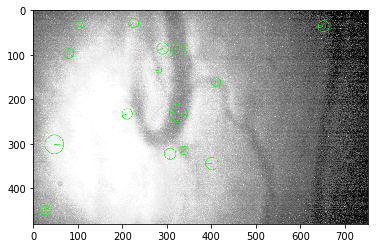

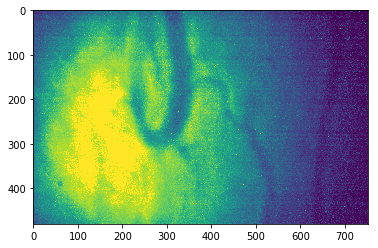

In [257]:
image_with_kp = np.array(first_frame)
image_with_kp = cv2.drawKeypoints(image_with_kp, kp_res, image_with_kp, color = (0,255,0)
                                  ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#image_with_kp =cv2.drawKeypoints(gray,kp)

plt.imshow(image_with_kp)
plt.show()
plt.imshow(cv2.equalizeHist(first_frame))

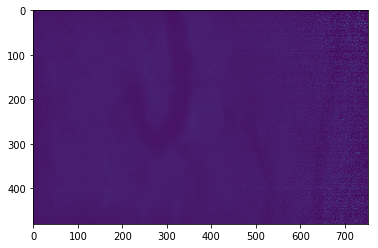

In [170]:
plt.imshow(np.array(first_frame) / cv2.GaussianBlur(np.array(first_frame) ,(201, 201), 90, 90))

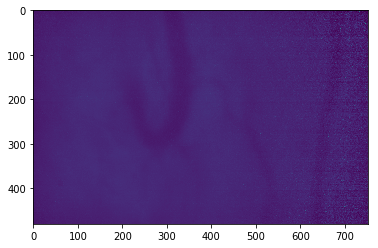

In [73]:
success,image = vidcap.read()
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = image.astype('float32') * 255.0 / image.max()
temp = np.array(image) / cv2.GaussianBlur(np.array(image) ,(201, 201), 90, 90)
plt.imshow(  temp)

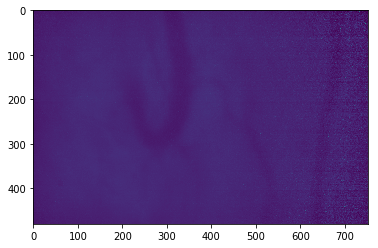

In [80]:
temp = temp / temp.max()
plt.imshow(  temp)

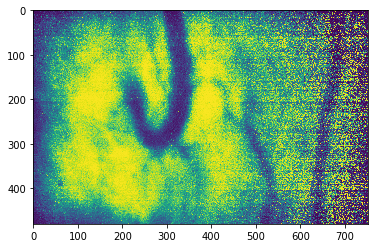

In [122]:
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf
t =  (np.round( temp * 255) + 200) % 256
t,_ = image_histogram_equalization(t)
plt.imshow( t )

([array([155., 277.,  41.,   4.,   3.,   0.,   0.,   0.,   0.,   0.]),
  array([129., 283.,  61.,   5.,   1.,   1.,   0.,   0.,   0.,   0.]),
  array([111., 295.,  63.,   4.,   3.,   1.,   3.,   0.,   0.,   0.]),
  array([100., 290.,  76.,   9.,   2.,   1.,   1.,   0.,   0.,   1.]),
  array([ 93., 286.,  93.,   3.,   2.,   3.,   0.,   0.,   0.,   0.]),
  array([ 91., 293.,  88.,   3.,   4.,   0.,   1.,   0.,   0.,   0.]),
  array([ 83., 288.,  97.,  11.,   1.,   0.,   0.,   0.,   0.,   0.]),
  array([ 55., 285., 112.,  19.,   4.,   4.,   1.,   0.,   0.,   0.]),
  array([ 64., 254., 138.,  15.,   6.,   2.,   1.,   0.,   0.,   0.]),
  array([ 58., 266., 140.,  10.,   6.,   0.,   0.,   0.,   0.,   0.]),
  array([ 47., 238., 154.,  31.,   5.,   4.,   1.,   0.,   0.,   0.]),
  array([ 45., 238., 152.,  33.,   6.,   5.,   1.,   0.,   0.,   0.]),
  array([ 41., 228., 163.,  25.,   9.,   7.,   6.,   0.,   0.,   1.]),
  array([ 44., 211., 174.,  37.,   9.,   3.,   1.,   1.,   0.,   0.]),
  arra

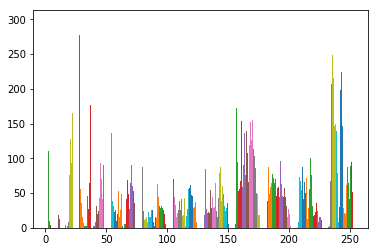

In [118]:
plt.hist(t)

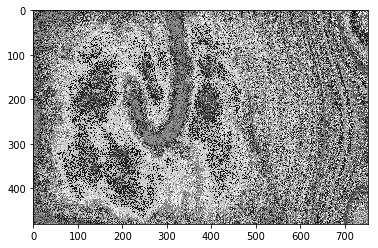

In [124]:
temp2 = np.zeros((rows,cols,3))
temp2[...,0] = t 
temp2[...,1] = t
temp2[...,2] = t
#temp = cv2.equalizeHist(first_frame) 
plt.imshow(temp2)

In [485]:
sift.detectAndCompute(cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY),None)

error: C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:11073: error: (-215) depth == 0 || depth == 2 || depth == 5 in function cv::cvtColor


In [482]:

first_frame.min()

0.0

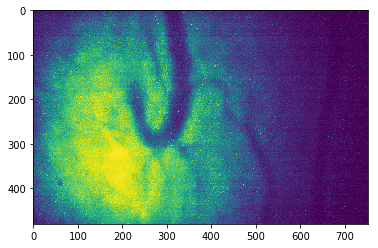

In [528]:
plt.imshow(preprocessing(img1))

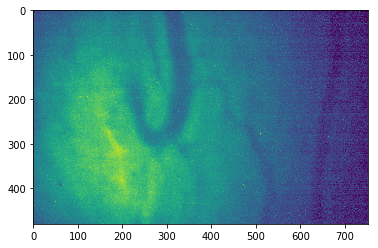

In [473]:
plt.imshow(first_frame*0.7)

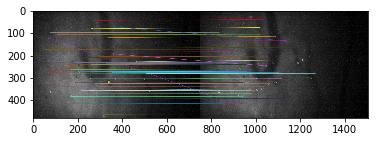

In [336]:
result = cv2.drawMatchesKnn(first_frame,kp,image,kp_cur,good,flags=2, outImg =  None)

plt.imshow(result)

In [3]:
count = 0; 
success,image = vidcap.read()
while success:
    success,image = vidcap.read()
    cv2.imwrite("images\\frame%d.jpg" % count, image)     # save frame as JPEG file
    if cv2.waitKey(10) == 27:                     # exit if Escape is hit
        break
    #tiltImages = np.append(tiltImages, image)
    count += 1

In [62]:
success,img1 = vidcap.read()

In [63]:
success,img2 = vidcap.read()

In [56]:
success,img3 = vidcap.read()

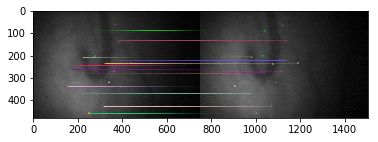

In [57]:
sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15, contrastThreshold = 0.009, edgeThreshold = 15, sigma = 2.2);

img1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3= cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(img3,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches12 = bf.knnMatch(des1,des2, k=2)
matches13 = bf.knnMatch(des1,des3, k=2)

# Apply ratio test
good12 = []
for m,n in matches12:
    if m.distance < 0.75*n.distance:
        good12.append([m])

good13 = []
for m,n in matches13:
    if m.distance < 0.75*n.distance:
        good13.append([m])
        
result12 = None
# cv2.drawMatchesKnn expects list of lists as matches.
result12 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good12,flags=2, outImg =  None)

result13 = None
# cv2.drawMatchesKnn expects list of lists as matches.
result13 = cv2.drawMatchesKnn(img1,kp1,img3,kp3,good13,flags=2, outImg =  None)

plt.imshow(result12)

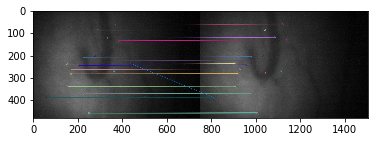

(<matplotlib.image.AxesImage at 0x1ffaae69c88>, None)

In [58]:
plt.imshow(result13), plt.show()

In [154]:
bf.knnMatch(des1,des2, k=5)

[[<DMatch 000001F05203E890>,
  <DMatch 000001F05203E8B0>,
  <DMatch 000001F05207C530>,
  <DMatch 000001F0520A2170>,
  <DMatch 000001F0520A21F0>],
 [<DMatch 000001F0520A2190>,
  <DMatch 000001F0520A21B0>,
  <DMatch 000001F0520A2230>,
  <DMatch 000001F0520A2250>,
  <DMatch 000001F0520A2210>],
 [<DMatch 000001F0520A2570>,
  <DMatch 000001F0520A2290>,
  <DMatch 000001F0520A2590>,
  <DMatch 000001F0520A25B0>,
  <DMatch 000001F0520A25D0>],
 [<DMatch 000001F0520A25F0>,
  <DMatch 000001F0520A2610>,
  <DMatch 000001F0520A2630>,
  <DMatch 000001F0520A2650>,
  <DMatch 000001F0520A2670>],
 [<DMatch 000001F0520A2690>,
  <DMatch 000001F0520A26B0>,
  <DMatch 000001F0520A26D0>,
  <DMatch 000001F0520A26F0>,
  <DMatch 000001F0520A2710>],
 [<DMatch 000001F0520A2730>,
  <DMatch 000001F0520A2750>,
  <DMatch 000001F0520A2770>,
  <DMatch 000001F0520A2790>,
  <DMatch 000001F0520A27B0>],
 [<DMatch 000001F0520A27D0>,
  <DMatch 000001F0520A27F0>,
  <DMatch 000001F0520A2810>,
  <DMatch 000001F0520A2830>,
  <DMatc

In [209]:
a = []
for i in range(len(good12)):
    a.append(good12[i][0].queryIdx)
b = []
for i in range(len(good13)):
    b.append(good13[i][0].queryIdx)
print(len(kp1), len(a), len(b), np.intersect1d(a,b))


34 26 23 [ 0  2  4  5  7  8  9 10 11 12 13 16 19 21 22 27 28 29 30 32 33]


32

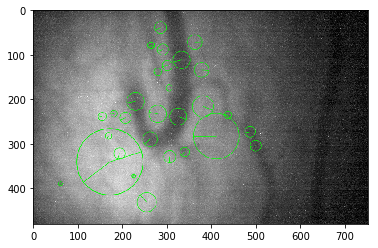

In [9]:
success, image = vidcap.read() 
gray= preprocessing(image) # cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15,contrastThreshold = 0.03,edgeThreshold = 35, sigma = 7.5)
kp = sift.detect(gray,None)

image_with_kp = gray
image_with_kp = cv2.drawKeypoints(gray, kp, image_with_kp, color = (0,255,0)
                                  ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#image_with_kp =cv2.drawKeypoints(gray,kp)

plt.imshow(image_with_kp)
len(kp)

In [10]:
from skimage.io import imsave
imsave('sift_result.jpg',image_with_kp)

In [8]:
kp1, des1 = sift.detectAndCompute(image,None)
kp2, des2 = sift.detectAndCompute(image2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

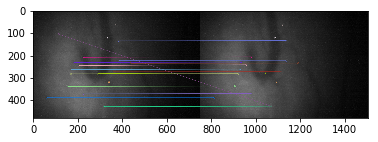

(<matplotlib.image.AxesImage at 0x1f04aa5cef0>, None)

In [14]:

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = None
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(image,kp1,image2,kp2,good,flags=2, outImg =  img3)

plt.imshow(img3),plt.show()

In [8]:
MIN_MATCH_COUNT = 10

if len(good12)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good12 ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good12 ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    image2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d",(len(good),MIN_MATCH_COUNT))
    matchesMask = None

In [ ]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(image,kp1,image2,kp2,matches1to2 = good, outImg =  img3,**draw_params)



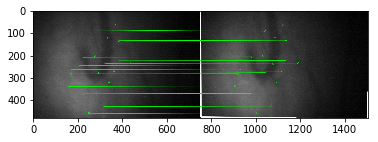

(<matplotlib.image.AxesImage at 0x1d0b97c7710>, None)

In [9]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

# img = cv2.drawMatchesKnn(image,kp1,image2,kp2,good, outImg =  img3,matchColor = (0,255,0), # draw matches in green color
#                    singlePointColor = None,
#                    matchesMask = matchesMask, # draw only inliers
#                    flags = 2)
img = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good12,flags=2, outImg =  None, matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None)

plt.imshow(img, 'gray'),plt.show()


In [78]:
type(matches.)

list

In [6]:
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
sift = cv2.FastFeatureDetector('SIFT')
kp = sift.detect(gray,None)

image_with_kp =cv2.drawKeypoints(gray,kp)

plt.imshow(image_with_kp)


TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)

In [9]:
s = cv2.ORB()

orb = cv2.

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(image,None)

TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)

In [19]:
response = cv2.cornerHarris(gray, 2,3,0.04)

In [23]:
cv2.SIFT()

AttributeError: module 'cv2.cv2' has no attribute 'SIFT'

In [4]:
import sift

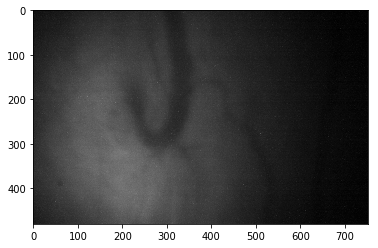

In [6]:
plt.imshow(image)

In [12]:
 # Merge exposures to HDR image
exposure_times = np.array([15.0, 2.5, 0.25, 0.0333], dtype=np.float32)

merge_debvec = cv2.createMergeDebevec()
hdr_debvec = merge_debvec.process(image, times=exposure_times.copy())
merge_robertson = cv2.createMergeRobertson()
hdr_robertson = merge_robertson.process(image, times=exposure_times.copy())

error: C:\projects\opencv-python\opencv\modules\photo\src\merge.cpp:67: error: (-215) images.size() == times.total() in function cv::MergeDebevecImpl::process


In [18]:
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (752,480))

In [24]:
import matplotlib.pyplot as plt
from skimage.io import imread
for i in range(1,1000):
    #im = imread('C:\\Users\\Тамерлан\\Documents\\aligned\\frame' + str(i) + '.jpg', plugin='matplotlib')
    success,image = vidcap.read()
    im = image
    out.write(im);
out.release()
cv2.destroyAllWindows()

In [18]:
t = np.fft.ifftn((np.conj(np.fft.fftn(img1))/np.abs(np.conj(np.fft.fftn(img1)))) *(np.fft.fftn(img2)/ np.abs(np.fft.fftn(img2))))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [35]:
import matplotlib.pyplot as plt
plt.imshow(np.abs(t))

NameError: name 't' is not defined

In [53]:
temp = imread('./images/frame0.jpg',as_grey=True)

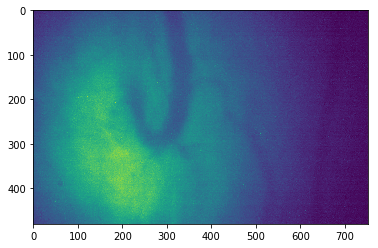

In [54]:
plt.imshow(temp)

In [55]:
temp.shape

(480, 752)

In [24]:
success,img1_ = vidcap.read()
success,img2_ = vidcap.read()
sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15, contrastThreshold = 0.03, edgeThreshold = 15, sigma = 7.5);
   

img1= preprocessing(img1_)# cv2.cvtColor(img1_,cv2.COLOR_BGR2GRAY)
img2= preprocessing(img2_) # cv2.cvtColor(img2_,cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

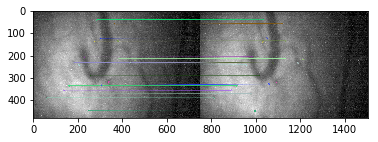

In [25]:
result = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2, outImg =  None)

plt.imshow(result)

In [26]:
MIN_MATCH_COUNT = 10

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold = 9.0)
    matchesMask = mask.ravel().tolist()

else:
    print("Not enough matches are found - %d/%d",(len(matches),MIN_MATCH_COUNT))
    matchesMask = None

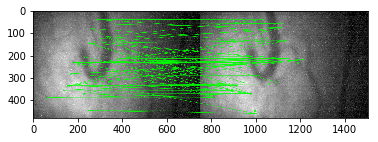

(<matplotlib.image.AxesImage at 0x1c58a2d6ba8>, None)

In [29]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

# img = cv2.drawMatchesKnn(image,kp1,image2,kp2,good, outImg =  img3,matchColor = (0,255,0), # draw matches in green color
#                    singlePointColor = None,
#                    matchesMask = matchesMask, # draw only inliers
#                    flags = 2)
img = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,flags=2, outImg =  None, matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None)

plt.imshow(img, 'gray'),plt.show()

In [30]:
imsave('bad_matches.jpg',img)

In [170]:
from skimage.io import imsave
imsave('r.jpg',img)

In [155]:
kp1_0 = []
kp2_0 = []
m_0 = []

kp1_1 = []
kp2_1 = []
m_1 = []
for i in range(len(good)):
    if matchesMask[i] ==0:
        kp1_0.append(kp1[good[i][0].queryIdx])
        kp2_0.append(kp2[good[i][0].trainIdx])
        m_0.append(good[i])
    else :
        kp1_1.append(kp1[good[i][0].queryIdx])
        kp2_1.append(kp2[good[i][0].trainIdx])
        m_1.append(good[i])

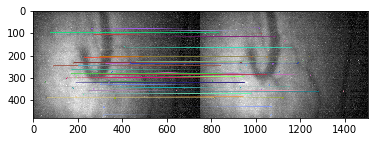

In [156]:
result = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2, outImg =  None)

plt.imshow(result)

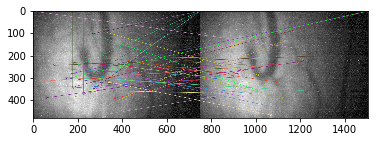

In [157]:
result = cv2.drawMatchesKnn(img1,kp1_1,img2,kp2_1,good,flags=2, outImg =  None)

plt.imshow(result)

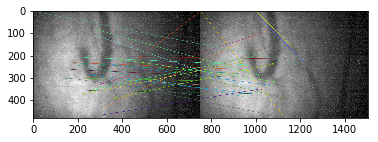

In [158]:
result = cv2.drawMatchesKnn(img1,kp1_1,img2,kp2_1,m_1,flags=2, outImg =  None)

plt.imshow(result)

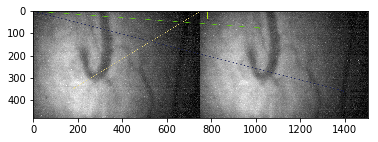

In [159]:
result = cv2.drawMatchesKnn(img1,kp1_0,img2,kp2_0,m_0,flags=2, outImg =  None)

plt.imshow(result)

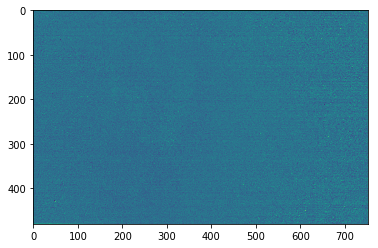

In [160]:
rows,cols = img1.shape
plt.imshow(img2 - cv2.warpPerspective(img1,M, (cols,rows))*255.0 / 250.)

In [652]:
temp = (img2 - cv2.warpPerspective(img1,M, (cols,rows))*255.0 / 250.) 
temp = (temp - temp.min()) / (temp.max() - temp.min())
imsave('sub.jpg',temp)

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [653]:
temp = (img2 - img1) 
temp = (temp - temp.min()) / (temp.max() - temp.min())
imsave('sub2.jpg',temp)

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [173]:
# imsave('1.jpg',img1)
# imsave('2.jpg',img2)
imsave('aligned.jpg',np.uint(cv2.warpPerspective(img1,M, (cols,rows))))

C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: aligned.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:171: UserWarning: Downcasting uint32 to uint8 without scaling because max value 253 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [171]:
rows, cols = img1.shape
imsave('resl.jpg',cv2.warpPerspective(img1,M, (cols,rows))*255.0 / 250. )
plt.imshow(cv2.warpPerspective(img1,M, (cols,rows))*255.0 / 250.)

ValueError: Images of type float must be between -1 and 1.

In [634]:
cv2.warpPerspective(img1,M, (cols,rows)).min()
img2.max()

255

In [635]:
((img1/255.0- img2/255.0)**2).mean()

0.007561610322407365

In [636]:
((img2/255.0- cv2.warpPerspective(img1,M, (cols,rows))/250.0)**2).mean()

0.01085177890856558

In [637]:
A = cv2.getAffineTransform(src_pts[0:3], dst_pts[0:3])

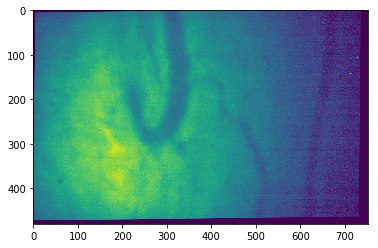

In [638]:
rows,cols = img1.shape
plt.imshow(cv2.warpAffine(img1,M[:2,:], (cols, rows)))

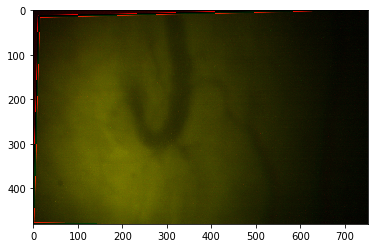

In [106]:
empty = np.zeros((rows,cols,3))
empty[...,0] = img2
empty[...,1] = cv2.warpPerspective(img1,M, (cols, rows))

plt.imshow(255 -  empty)

In [39]:
H = np.array([[1,0,0],
    [0,1,0],
    [0,0,1]])

In [40]:
H

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [108]:
len(kp1)

49

In [177]:
from skimage.io import imsave

def alignvideo1n():
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('.\output.avi', fourcc, 20.0, (752,480))
    
    filename = '.\msCam1.avi'
    vidcap = cv2.VideoCapture(filename)
    sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15, contrastThreshold = 0.009, edgeThreshold = 35, sigma = 7.5);

    
    success,anchor = vidcap.read()
    kp_anchor, des_anchor = sift.detectAndCompute(anchor,None)
    anchor = preprocessing(anchor)
    imsave('.\\aligned1n\\frame0.jpg' ,anchor)
    out.write(anchor);
    H = np.array([[1,0,0],
                [0,1,0], [0,0,1]])
#     plt.imshow(cv2.drawKeypoints(anchor, kp_anchor, None, color = (0,255,0)
#                                   ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
#     plt.show()
    count = 1
    while success:
        success,image = vidcap.read()
        image = preprocessing(image)
        
        kp, des = sift.detectAndCompute(image,None)
#             plt.imshow(cv2.drawKeypoints(image, kp, None, color = (0,255,0)
#                                   ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
#             plt.show()

        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des_anchor,des, k=2)

        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])


        MIN_MATCH_COUNT = 10

        if len(good)>MIN_MATCH_COUNT:
            dst_pts = np.float32([ kp_anchor[m[0].queryIdx].pt for m in good]).reshape(-1,1,2)
            src_pts = np.float32([ kp[m[0].trainIdx].pt for m in good]).reshape(-1,1,2)

            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold = 9.0)
            matchesMask = mask.ravel().tolist()

        else:
            print("Not enough matches are found - %d/%d",(len(matches),MIN_MATCH_COUNT))
            matchesMask = None
            raise('Error')


        kp_anchor = kp
        des_anchor = des
        anchor = image

        rows,cols = image.shape
        H = np.dot(H,M)
        img = cv2.warpPerspective(image,H, (cols,rows))
        out.write(img);
        imsave('.\\aligned1n\\frame%d.jpg' % count,img)
        count = count + 1
        if count == 150:
            break;
    out.release()
    cv2.destroyAllWindows()
    return 

In [178]:
from skimage.io import imsave

def alignvideo11():
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('.\output.avi', fourcc, 20.0, (752,480))
    
    filename = '.\msCam1.avi'
    vidcap = cv2.VideoCapture(filename)
    sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15, contrastThreshold = 0.009, edgeThreshold = 35, sigma = 7.5);

    
    success,anchor = vidcap.read()
    kp_anchor, des_anchor = sift.detectAndCompute(anchor,None)
    anchor = preprocessing(anchor)
    out.write(anchor);
#     plt.imshow(cv2.drawKeypoints(anchor, kp_anchor, None, color = (0,255,0)
#                                   ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
#     plt.show()
    count = 0 
    while success:
        success,image = vidcap.read()
        image = preprocessing(image)

        kp, des = sift.detectAndCompute(image,None)
#             plt.imshow(cv2.drawKeypoints(image, kp, None, color = (0,255,0)
#                                   ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
#             plt.show()

        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des_anchor,des, k=2)

        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])


        MIN_MATCH_COUNT = 10

        if len(good)>MIN_MATCH_COUNT:
            dst_pts = np.float32([ kp_anchor[m[0].queryIdx].pt for m in good]).reshape(-1,1,2)
            src_pts = np.float32([ kp[m[0].trainIdx].pt for m in good]).reshape(-1,1,2)

            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold = 9.0)
            matchesMask = mask.ravel().tolist()

        else:
            print("Not enough matches are found - %d/%d",(len(matches),MIN_MATCH_COUNT))
            matchesMask = None
            raise('Error')



        rows,cols = image.shape
        img = cv2.warpPerspective(image,M, (cols,rows))
        out.write(img);
        imsave('.\\aligned11\\frame%d.jpg' % count,img)
        count = count + 1
        if count == 150:
            break;
    out.release()
    cv2.destroyAllWindows()
    return 

In [179]:
alignvideo1n()

In [105]:
import matplotlib.pyplot as plt
from skimage.io import imread

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('.\\output.avi', fourcc, 20.0, (752,480))
for i in range(0,150):
    im = imread('.\\aligned1n\\frame%d.jpg' % i, plugin='matplotlib')
    out.write(im);
out.release()
cv2.destroyAllWindows()

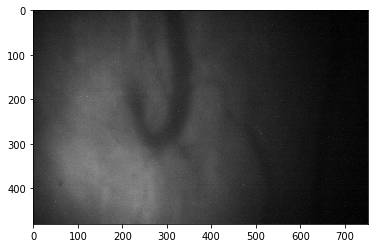

In [40]:
plt.imshow(image)

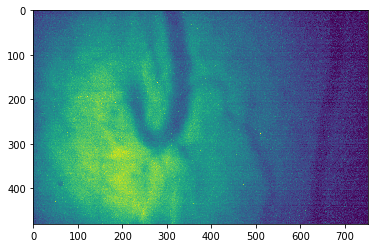

In [82]:
from scipy.ndimage.interpolation import shift, rotate
_, image= vidcap.read()
image = preprocessing(image)
img2 = rotate(image,5 )
img3 = np.roll(img2, 55,axis = 1)# rotate(img2,-15 )
plt.imshow(image)

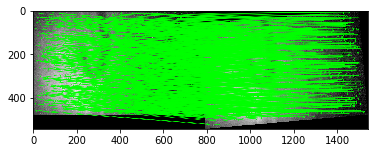

In [83]:
sift = cv2.xfeatures2d.SIFT_create( nOctaveLayers =  15, contrastThreshold = 0.009, edgeThreshold = 15, sigma = 2.2);

kp1, des1 = sift.detectAndCompute(image,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(img3,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
matches23 = bf.knnMatch(des2,des3, k=2)

good23 = []
for m,n in matches23:
    if m.distance < 0.75*n.distance:
        good23.append([m])


r = cv2.drawMatchesKnn(image,kp1,img2,kp2,good,flags=2, outImg =  None, matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None)

plt.imshow(r, 'gray'),plt.show()        
        
MIN_MATCH_COUNT = 10

if len(good)>MIN_MATCH_COUNT:
    dst_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good]).reshape(-1,1,2)
    src_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold = 9.0)
    matchesMask = mask.ravel().tolist()

    h,w = img2.shape


else:
    print("Not enough matches are found - %d/%d",(len(matches),MIN_MATCH_COUNT))
    matchesMask = None
    
MIN_MATCH_COUNT = 10

if len(good23)>MIN_MATCH_COUNT:
    dst_pts = np.float32([ kp2[m[0].queryIdx].pt for m in good23]).reshape(-1,1,2)
    src_pts = np.float32([ kp3[m[0].trainIdx].pt for m in good23]).reshape(-1,1,2)

    M23, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold = 9.0)
    matchesMask = mask.ravel().tolist()

    h,w = img2.shape


else:
    print("Not enough matches are found - %d/%d",(len(matches),MIN_MATCH_COUNT))
    matchesMask = None

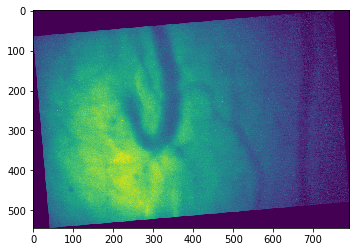

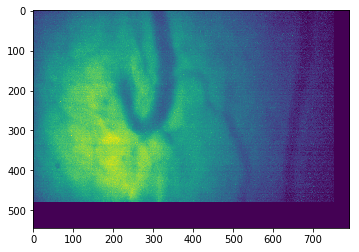

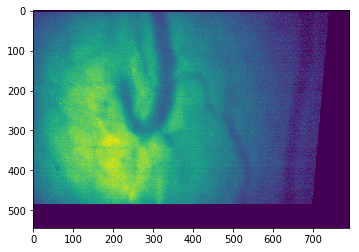

In [87]:
#M = np.linalg.inv(M)
plt.imshow(cv2.warpPerspective(image,np.linalg.inv(M), (w,h)))
plt.show()
plt.imshow(cv2.warpPerspective(img2,M, (w,h)))
plt.show()
plt.imshow(cv2.warpPerspective(img3, np.dot(M23, M), (w,h)))

In [86]:
M

array([[ 9.96210892e-01, -8.70619194e-02,  5.67006577e+00],
       [ 8.71622994e-02,  9.96268414e-01, -6.54224101e+01],
       [-1.59715438e-08,  1.88531627e-07,  1.00000000e+00]])

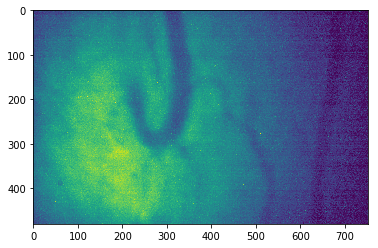

In [44]:
plt.imshow(image)
plt.show()